# ADECUACIÓN DEL DATASET
___

In [1]:
import pandas as pd

movie_dat = pd.read_csv('/Users/angel/Desktop/movies.dat', encoding='latin1', delimiter='::', engine='python', header=None)
column_names = ['Indice', 'Nombre de la Película/Año', 'Géneros']
movie_dat.columns = column_names
movie_dat = movie_dat.drop(movie_dat.columns[0], axis=1)
movie_dat.index = movie_dat.index + 1

movie_dat

,Nombre de la Película/Año,Géneros
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3879,Meet the Parents (2000),Comedy
3880,Requiem for a Dream (2000),Drama
3881,Tigerland (2000),Drama
3882,Two Family House (2000),Drama


In [2]:
duplicados = movie_dat[movie_dat.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [Nombre de la Película/Año, Géneros]
Index: []


In [3]:
print(movie_dat.isnull().sum())

Nombre de la Película/Año    0
Géneros                      0
dtype: int64


Compruebo que el df no tiene duplicados ni valores NaN. Ahora paso a adecuar las columnas empezando por separar el año del título.

In [4]:
movie_dat[['Título', 'Año']] = movie_dat['Nombre de la Película/Año'].str.split('(', n=1, expand=True)
movie_dat.drop(columns=['Nombre de la Película/Año'], inplace=True)
movie_dat

,Géneros,Título,Año
1,Animation|Children's|Comedy,Toy Story,1995)
2,Adventure|Children's|Fantasy,Jumanji,1995)
3,Comedy|Romance,Grumpier Old Men,1995)
4,Comedy|Drama,Waiting to Exhale,1995)
5,Comedy,Father of the Bride Part II,1995)
...,...,...,...
3879,Comedy,Meet the Parents,2000)
3880,Drama,Requiem for a Dream,2000)
3881,Drama,Tigerland,2000)
3882,Drama,Two Family House,2000)


Aqui separo la cadena a partir de '(' y ahora me quedo solo con el número.

In [5]:
movie_dat['Año'] = movie_dat['Año'].str.extract('(\d+)')

movie_dat

,Géneros,Título,Año
1,Animation|Children's|Comedy,Toy Story,1995
2,Adventure|Children's|Fantasy,Jumanji,1995
3,Comedy|Romance,Grumpier Old Men,1995
4,Comedy|Drama,Waiting to Exhale,1995
5,Comedy,Father of the Bride Part II,1995
...,...,...,...
3879,Comedy,Meet the Parents,2000
3880,Drama,Requiem for a Dream,2000
3881,Drama,Tigerland,2000
3882,Drama,Two Family House,2000


In [6]:
tipo_dato=movie_dat.dtypes
print(tipo_dato)

Géneros    object
Título     object
Año        object
dtype: object


In [7]:
movie_dat['Año'] = movie_dat['Año'].astype(int)

In [8]:
tipo_dato=movie_dat.dtypes
print(tipo_dato)

Géneros    object
Título     object
Año         int64
dtype: object


Paso a obtener información de la columna Géneros

In [9]:
generos = movie_dat['Géneros'].str.split('|').explode()
count_generos = generos.value_counts()
total_generos = len(count_generos)
print(f"El dataframe contiene {total_generos} géneros distintos y la cantidad de veces que se repiten es:\n{count_generos}")


El dataframe contiene 18 géneros distintos y la cantidad de veces que se repiten es:
Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
Name: Géneros, dtype: int64


Teniendo en cuenta que hay peliculas con un único genero y otras con tres, planteo crear una columna boleana para cada género y así poder consultar por cada uno de ellos.

In [10]:
generos_separados = movie_dat['Géneros'].str.get_dummies('|')
movie_dat_generos= pd.concat([movie_dat, generos_separados], axis=1)
movie_dat_generos

,Géneros,Título,Año,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,Animation|Children's|Comedy,Toy Story,1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adventure|Children's|Fantasy,Jumanji,1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Comedy|Romance,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Comedy|Drama,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Comedy,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,Comedy,Meet the Parents,2000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,Drama,Requiem for a Dream,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,Drama,Tigerland,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3882,Drama,Two Family House,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


En este caso nos genera una columna por género. Hay información mas completa pero es más complejo de visualizar. 

El siguiente df muestra un único género por película. En las películas con varios géneros, se ha seleccionado el que más veces se repite contando todos los resultados.

In [11]:
generos_separados = movie_dat['Géneros'].str.get_dummies('|')
genero_mas_comun = generos_separados.apply(lambda row: row.idxmax(), axis=1)
movie_dat['Género'] = genero_mas_comun
movie_dat.drop('Géneros', axis=1, inplace=True)

movie_dat

,Título,Año,Género
1,Toy Story,1995,Animation
2,Jumanji,1995,Adventure
3,Grumpier Old Men,1995,Comedy
4,Waiting to Exhale,1995,Comedy
5,Father of the Bride Part II,1995,Comedy
...,...,...,...
3879,Meet the Parents,2000,Comedy
3880,Requiem for a Dream,2000,Drama
3881,Tigerland,2000,Drama
3882,Two Family House,2000,Drama


## VISUALIZACIONES 
___

Conteo de las veces que aparece cada género en el conjunto de datos.

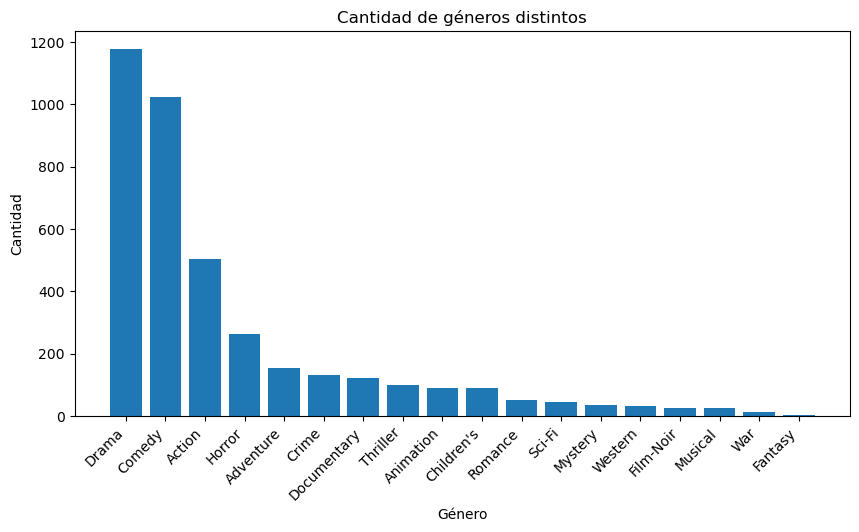

In [12]:
import matplotlib.pyplot as plt

generos = movie_dat['Género'].str.split('|').explode()
genero_contador = generos.value_counts()

plt.figure(figsize=(10,5))
plt.bar(genero_contador.index, genero_contador.values)
plt.title('Cantidad de géneros distintos')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()

En esta segunda visualización añado el porcentaje que representa cada género sobre el total de los datos.

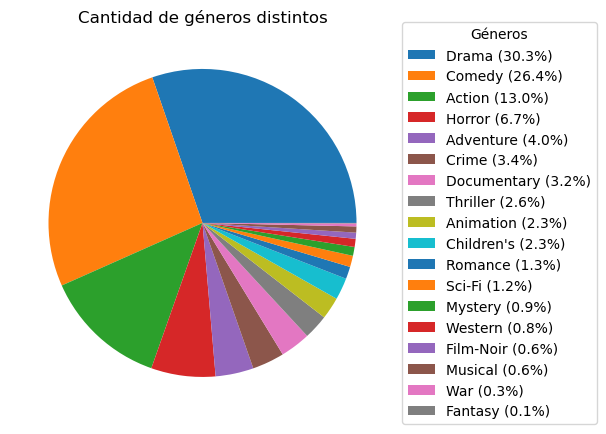

In [13]:
generos = movie_dat['Género'].str.split('|').explode()
genero_contador = generos.value_counts()

plt.figure(figsize=(10,5))
plt.pie(genero_contador.values)
plt.title('Cantidad de géneros distintos')
labels = [f'{genero} ({porcentaje:.1f}%)' for genero, porcentaje in zip(genero_contador.index, genero_contador.values / genero_contador.sum() * 100)]
plt.legend(labels, title='Géneros', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

En la siguiente representación, muestro en qué años se concentran la mayor parte de las películas. 

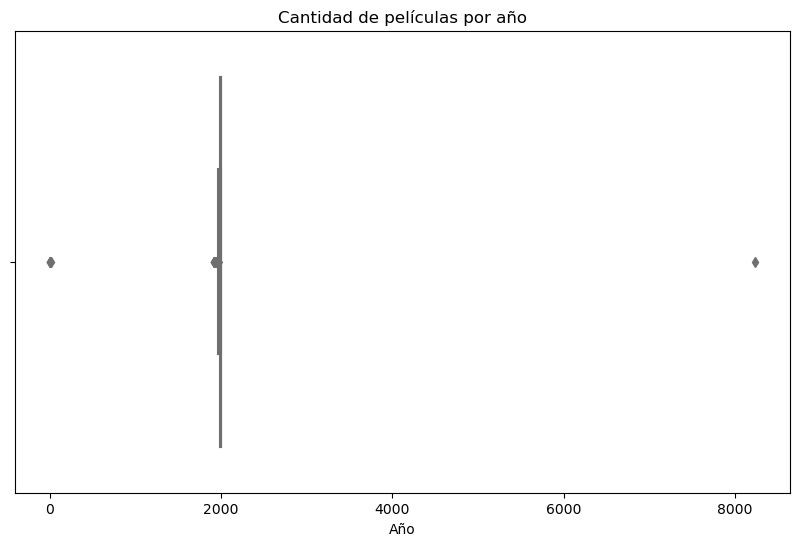

In [14]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Año', data=movie_dat, color='skyblue')
plt.title('Cantidad de películas por año')
plt.xlabel('Año')
plt.show()

In [15]:
maximo_valor = movie_dat['Año'].max()
minimo_valor = movie_dat['Año'].min()

print(f"Valor máximo en 'Año': {maximo_valor}")
print(f"Valor mínimo en 'Año': {minimo_valor}")

Valor máximo en 'Año': 8230
Valor mínimo en 'Año': 1


In [16]:
movie_dat_filtrado = movie_dat[(movie_dat['Año'] < 1900) | (movie_dat['Año'] > 2024)]

movie_dat_filtrado

,Título,Año,Género
47,Seven,7,Crime
771,Independence Day,4,Action
1447,Jungle2Jungle,2,Children's
2755,"Spiders, The",1,Action
3577,Cleo From 5 to 7,5,Drama
3776,And God Created Woman,8230,Drama


Algunas películas tienen valores imposibles para 'Año'. Al seleccionarlas para visualizarlas parece un error. Al ser solo 6 sobre 3883 las elimino. También se podrían buscar los años reales de las películas y editarlas manualmente.

In [17]:
filas_con_errores = movie_dat[(movie_dat['Año'] < 1900) | (movie_dat['Año'] > 2024)]
movie_dat = movie_dat.drop(filas_con_errores.index)

movie_dat

,Título,Año,Género
1,Toy Story,1995,Animation
2,Jumanji,1995,Adventure
3,Grumpier Old Men,1995,Comedy
4,Waiting to Exhale,1995,Comedy
5,Father of the Bride Part II,1995,Comedy
...,...,...,...
3879,Meet the Parents,2000,Comedy
3880,Requiem for a Dream,2000,Drama
3881,Tigerland,2000,Drama
3882,Two Family House,2000,Drama


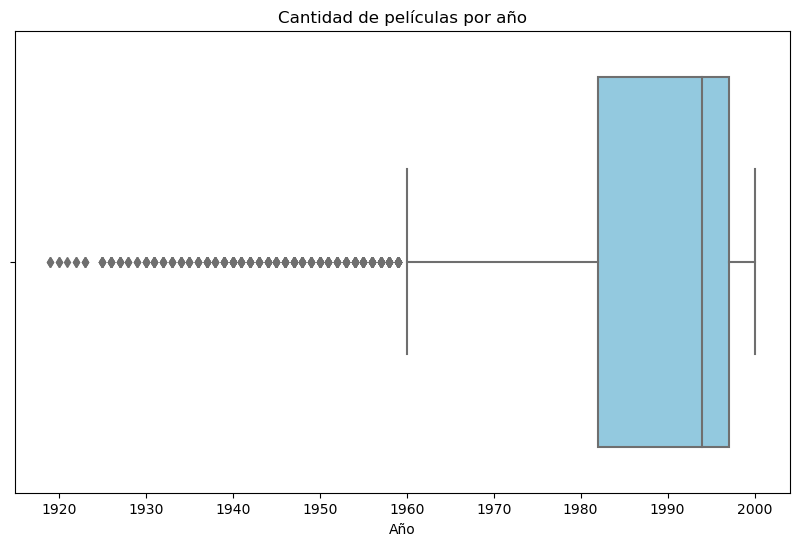

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Año', data=movie_dat, color='skyblue')
plt.title('Cantidad de películas por año')
plt.xlabel('Año')
plt.show()

La muestra contiene películas realizadas entre 1919 y 2000. La mayor parte de los datos se encuentran entre 1960 y 2000. Ahora calculo cuántas quedan fuera del rango intercuartil.

In [19]:
q1 = movie_dat['Año'].quantile(0.25)
q3 = movie_dat['Año'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr

print(f'Extremo inferior de la muestra: {lower_whisker}')


Extremo inferior de la muestra: 1959.5


In [20]:
peliculas_entre_1919_y_whisker = movie_dat[(movie_dat['Año'] >= 1919) & (movie_dat['Año'] < lower_whisker)]

peliculas_entre_1919_y_whisker

,Título,Año,Género
591,Snow White and the Seven Dwarfs,1937,Animation
593,Pinocchio,1940,Animation
663,Pather Panchali,1955,Drama
664,Aparajito,1956,Drama
665,"World of Apu, The",1959,Drama
...,...,...,...
3862,"Giant Gila Monster, The",1959,Horror
3863,"Invisible Man, The",1933,Horror
3864,"Killer Shrews, The",1959,Horror
3865,Kronos,1957,Sci-Fi


En la última visualización se muestra la cantidad de películas por año, representadas también por su género.

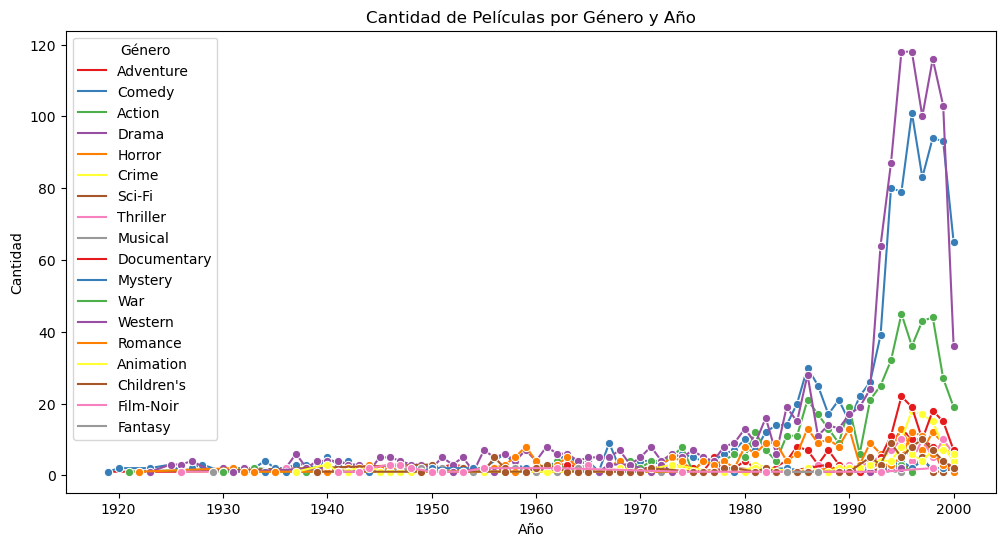

In [21]:
plt.figure(figsize=(12, 6))

df_genero_año = movie_dat.groupby(['Año', 'Género']).size().reset_index(name='Cantidad')
sns.lineplot(x='Año', y='Cantidad', hue='Género', data=df_genero_año, palette='Set1', marker='o')
plt.title('Cantidad de Películas por Género y Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Género', loc='upper left')
plt.show()